In [1]:
import os
import torch
import numpy as np
import sys
sys.path.append('../src')
sys.path.append('../../src')
sys.path.append('../../src/original')
from example_reactiondiffusion import get_rd_data
import matplotlib.colors as mcolors
import pickle5 as pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

named_colors = list(mcolors.TABLEAU_COLORS)

device = 'cpu'#torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
_, _, test_data = get_rd_data()

In [3]:
x = torch.Tensor(test_data['x']).to(device)
dx = torch.Tensor(test_data['dx']).to(device)

In [4]:
model_names = sorted(list(os.listdir('./models_pAE')))

In [7]:
z_hat = {}
dz_hat = {}

for name in tqdm(model_names):
    model = torch.load(os.path.join('.', 'models_pAE', name)).to(device)
    z_hat[name] = model.autoencoder.encoder(x).detach().cpu().numpy()
    dz_hat[name] = model.transform_time_derivative_1st_order(model.autoencoder.encoder, x, dx)
    dz_hat[name] = dz_hat[name].detach().cpu().numpy()

100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


In [10]:
test_data['t'].shape, z_hat[name].shape

((1000, 1), (1000, 2))

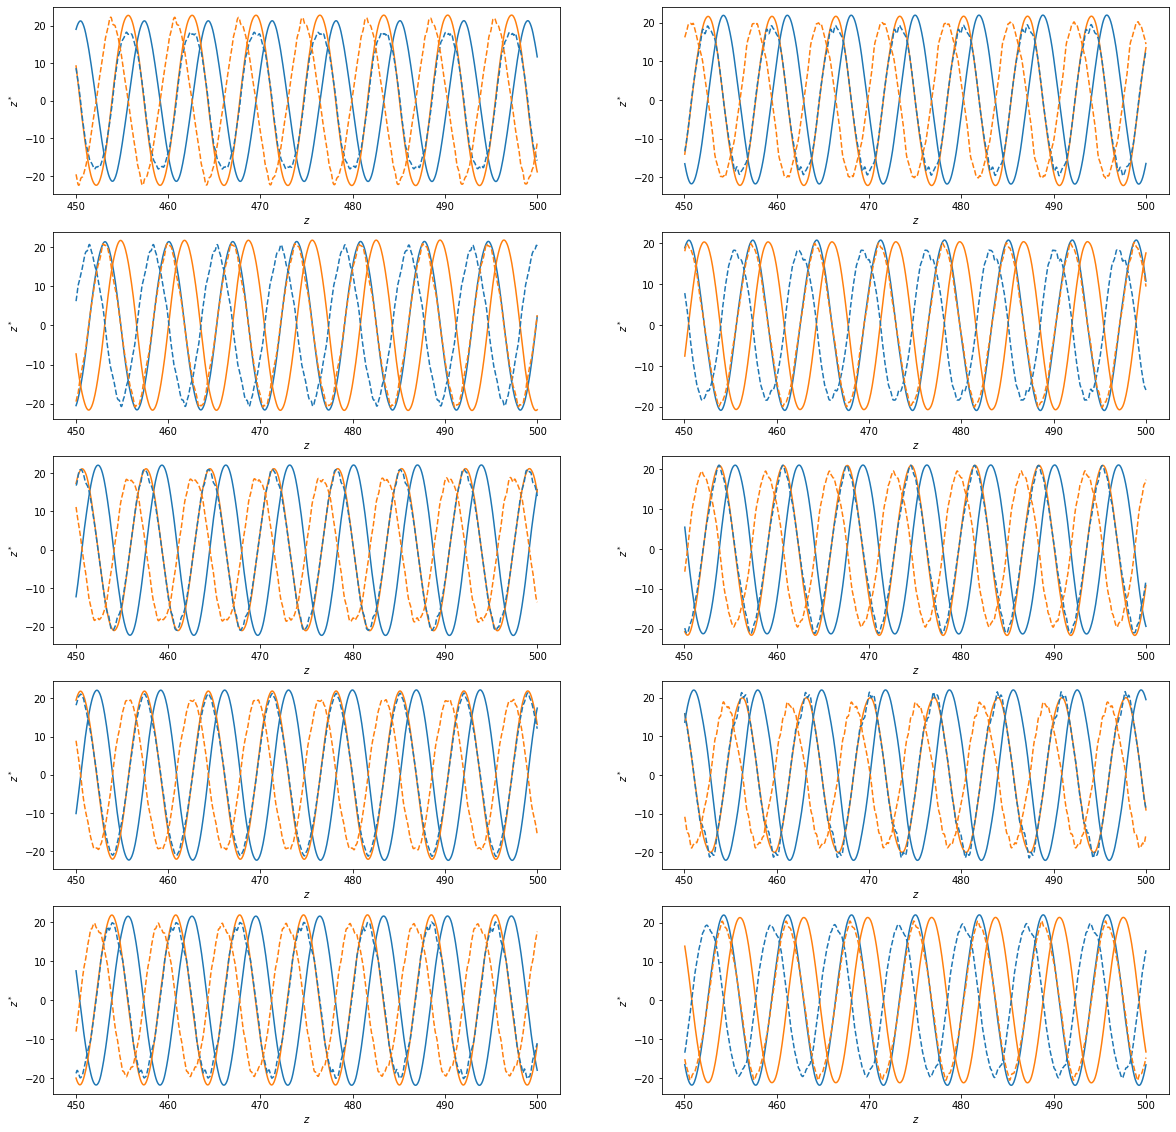

In [20]:
COLS = 2
fig, ax = plt.subplots(5, COLS, figsize=(20, 20))

for i in range(10):
    ax[i//COLS][i%COLS].plot(test_data['t'], z_hat[model_names[i]][:, 0], color='tab:blue');
    ax[i//COLS][i%COLS].plot(test_data['t'], z_hat[model_names[i]][:, 1], color='tab:orange');
    ax[i//COLS][i%COLS].plot(test_data['t'], dz_hat[model_names[i]][:, 0], color='tab:blue', linestyle='--');
    ax[i//COLS][i%COLS].plot(test_data['t'], dz_hat[model_names[i]][:, 1], color='tab:orange', linestyle='--');
    
    ax[i//COLS][i%COLS].set_xlabel(r'$z$'); ax[i//COLS][i%COLS].set_ylabel(r'$z^*$')